In [4]:
import warnings
warnings.simplefilter('ignore')
import pickle
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from pandas_profiling import ProfileReport
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [5]:
df_score=pd.read_csv("happiness_score_dataset.csv")

In [6]:
df_score.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df_score.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
df_score.shape

(158, 12)

In [9]:
df_score.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This shows that no columns in the given dataset has null values

In [10]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country and Region are categorical values that can be converted to the numerical values but no need consider this in skewness

In [11]:
df_score.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Here we get the insights of the numercial datas by leaving the categorical data.we can see mean,median,min,max,count etc..

In [12]:
df_score.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Hapiness score is the label/output column and rest of the column and rest of the columns are the features 'Country','Region','Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health(Life Expectancy)','Freedom','Trust(Government Corruption)','Generosity','Dystopia Residual'

Dropping Categorical data that are not contributing to the label prediction:

In [13]:
df_score_New=df_score.drop(['Country','Region','Happiness Rank'],axis=1)

Here we have dropped the columns using drop command

Visualizing the data:

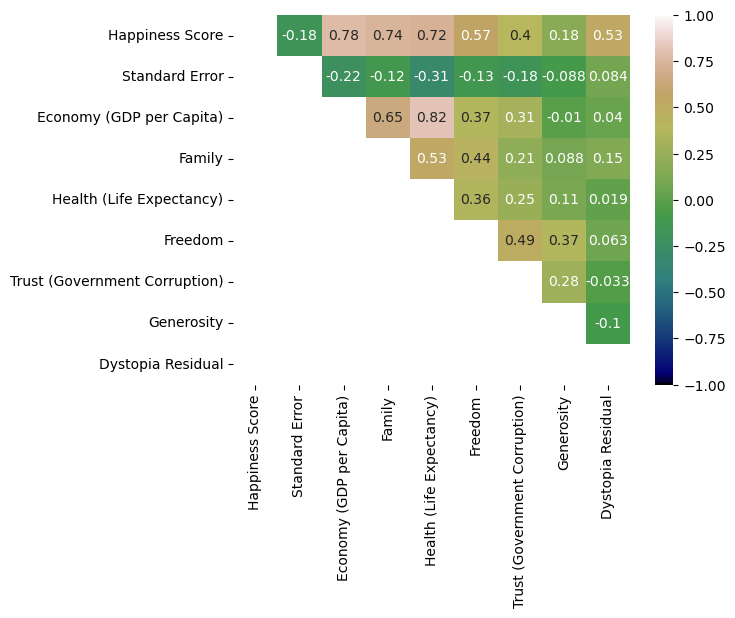

In [14]:
upper_triangel=np.tril(df_score_New.corr())
sns.heatmap(df_score_New.corr(),vmin=-1,vmax=1,annot=True,annot_kws={'size':10},cmap='gist_earth',mask=upper_triangel)
plt.show()

From above graph we can able to check the correlation between the hapiness score with other features columns.No dark boxex are present which represent that somewhat all these columns are contributing to the prediction of the label. 

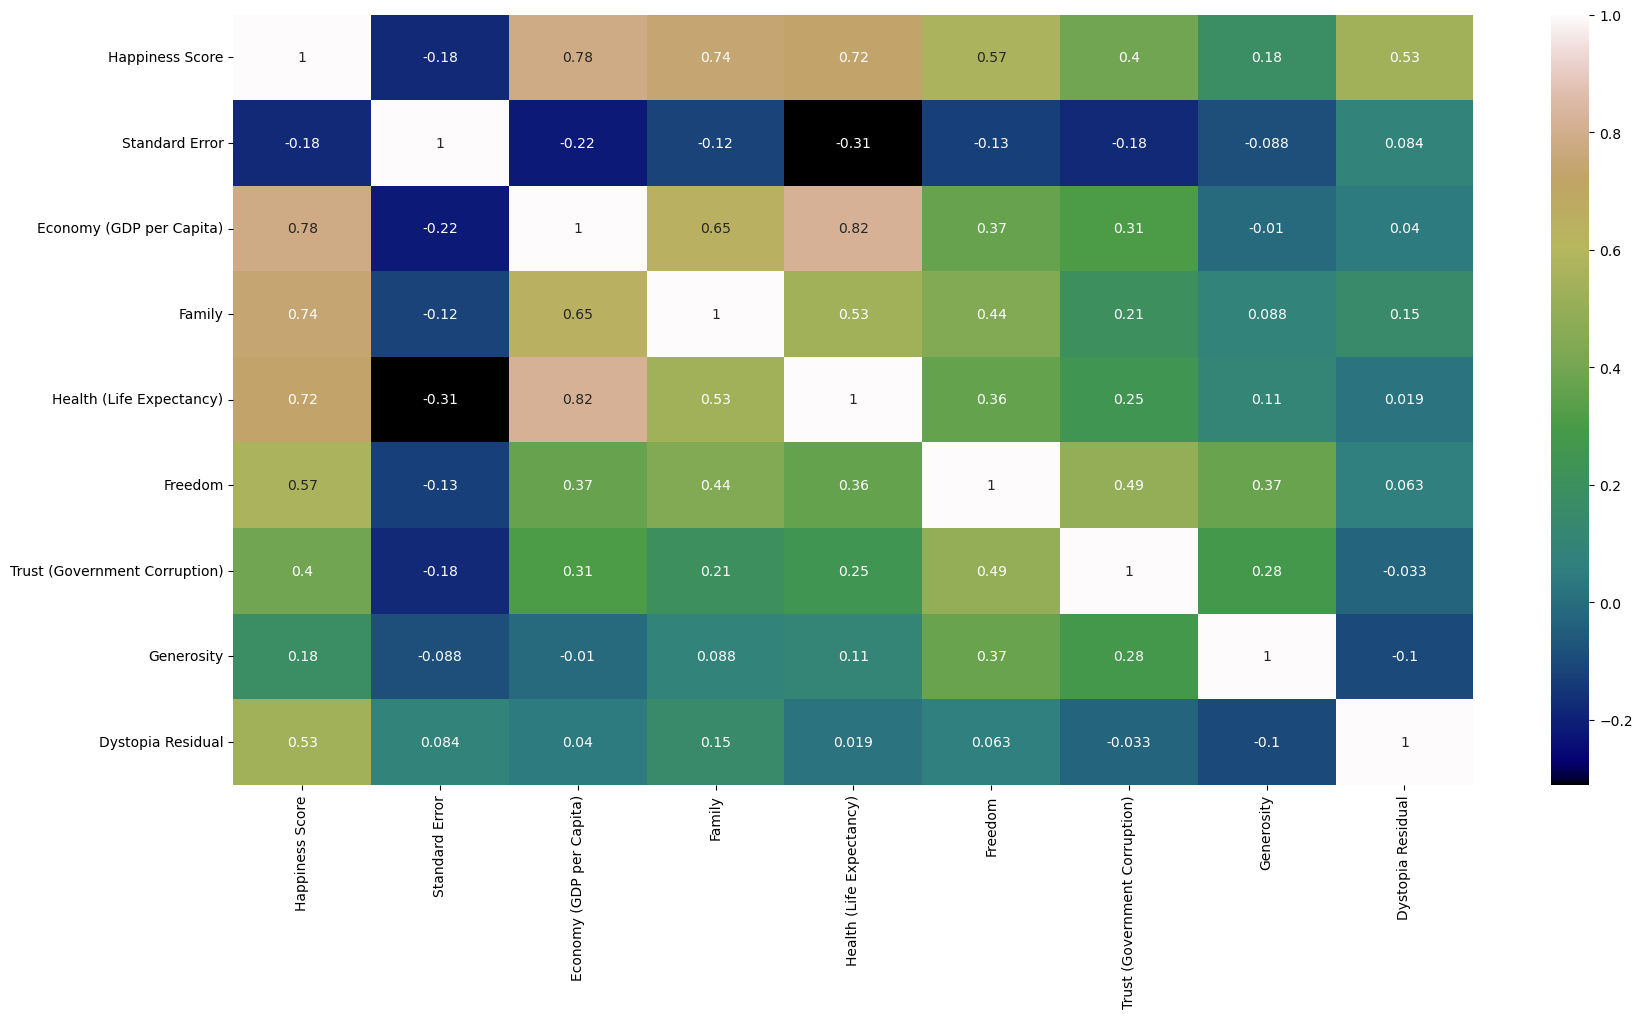

In [15]:
corr_hmap=df_score_New.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_hmap,annot=True,cmap='gist_earth')
plt.show()

Heatmap Observations:

1.Happiness Score is in dark blue in color with Standard Error that indicates that they are negatively correlated to each other.
2.The dark black colors indicates that they are very high negatively correlation to eachother
3.the Light colors indicate the positive correlation between the two cloumns.

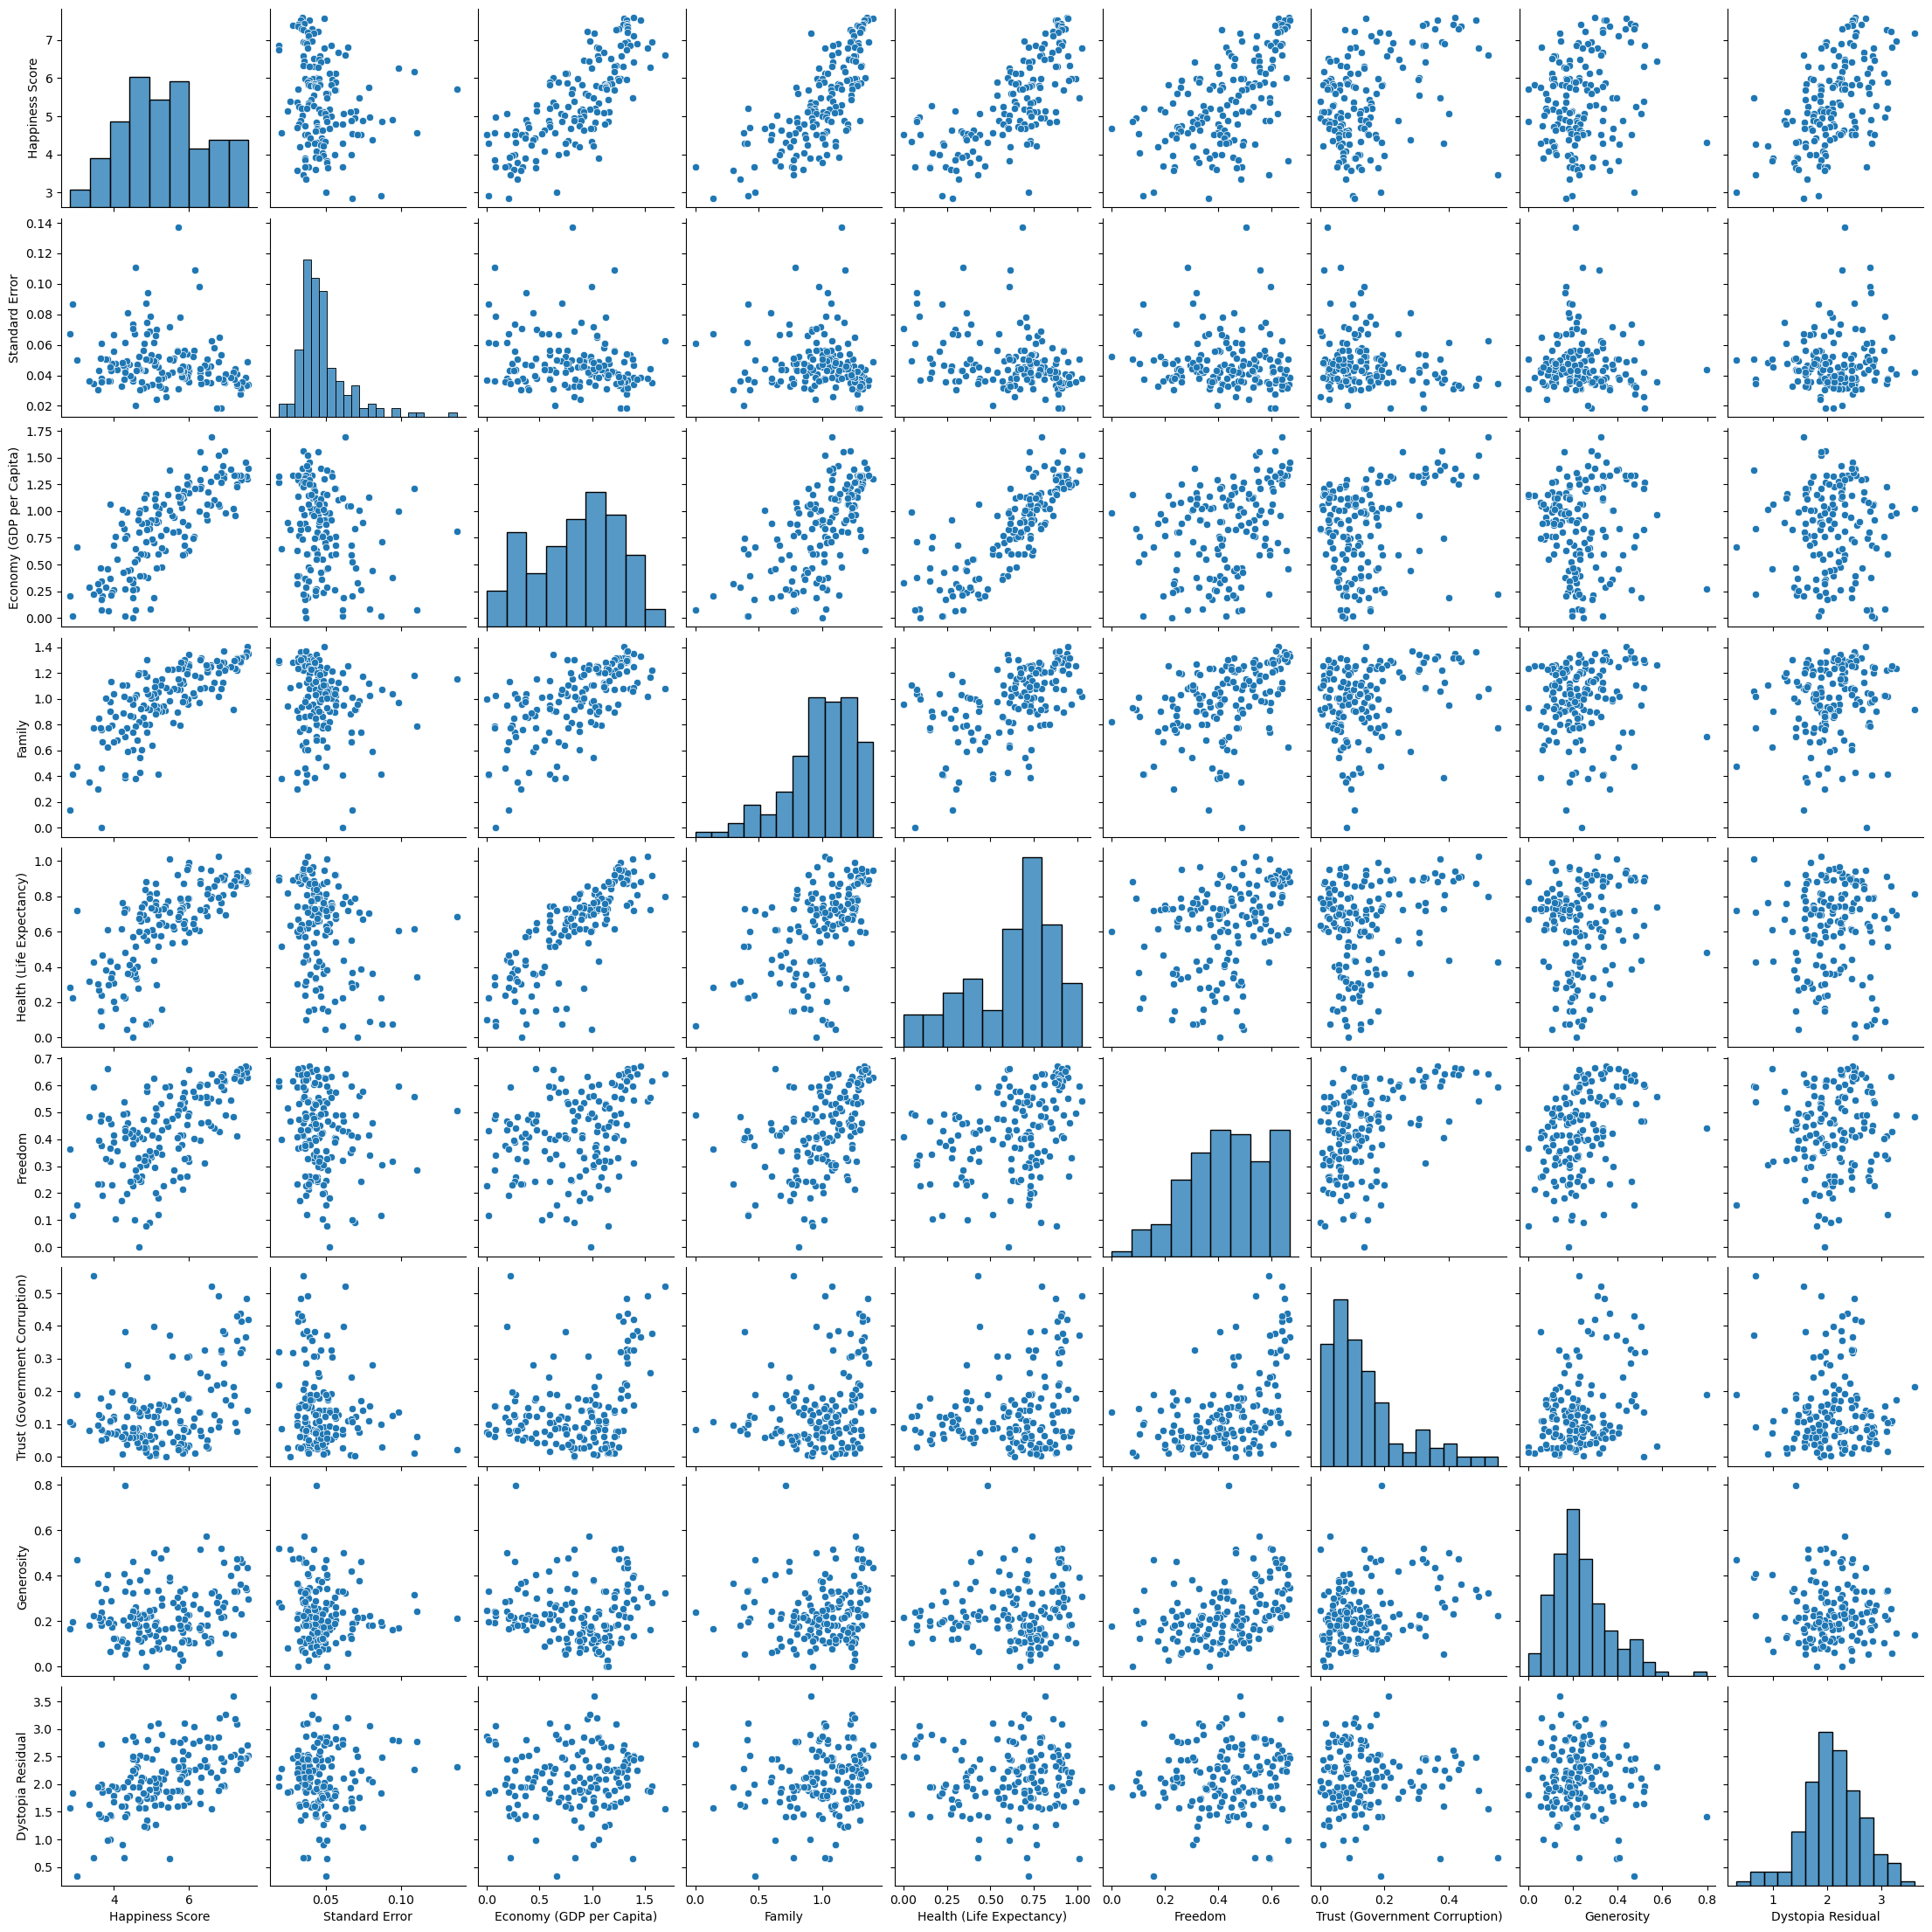

In [16]:
sns.pairplot(df_score_New)
plt.show()

In pairplot how datas are distributed by using scatter Plot and histogram

# Using Histogram:

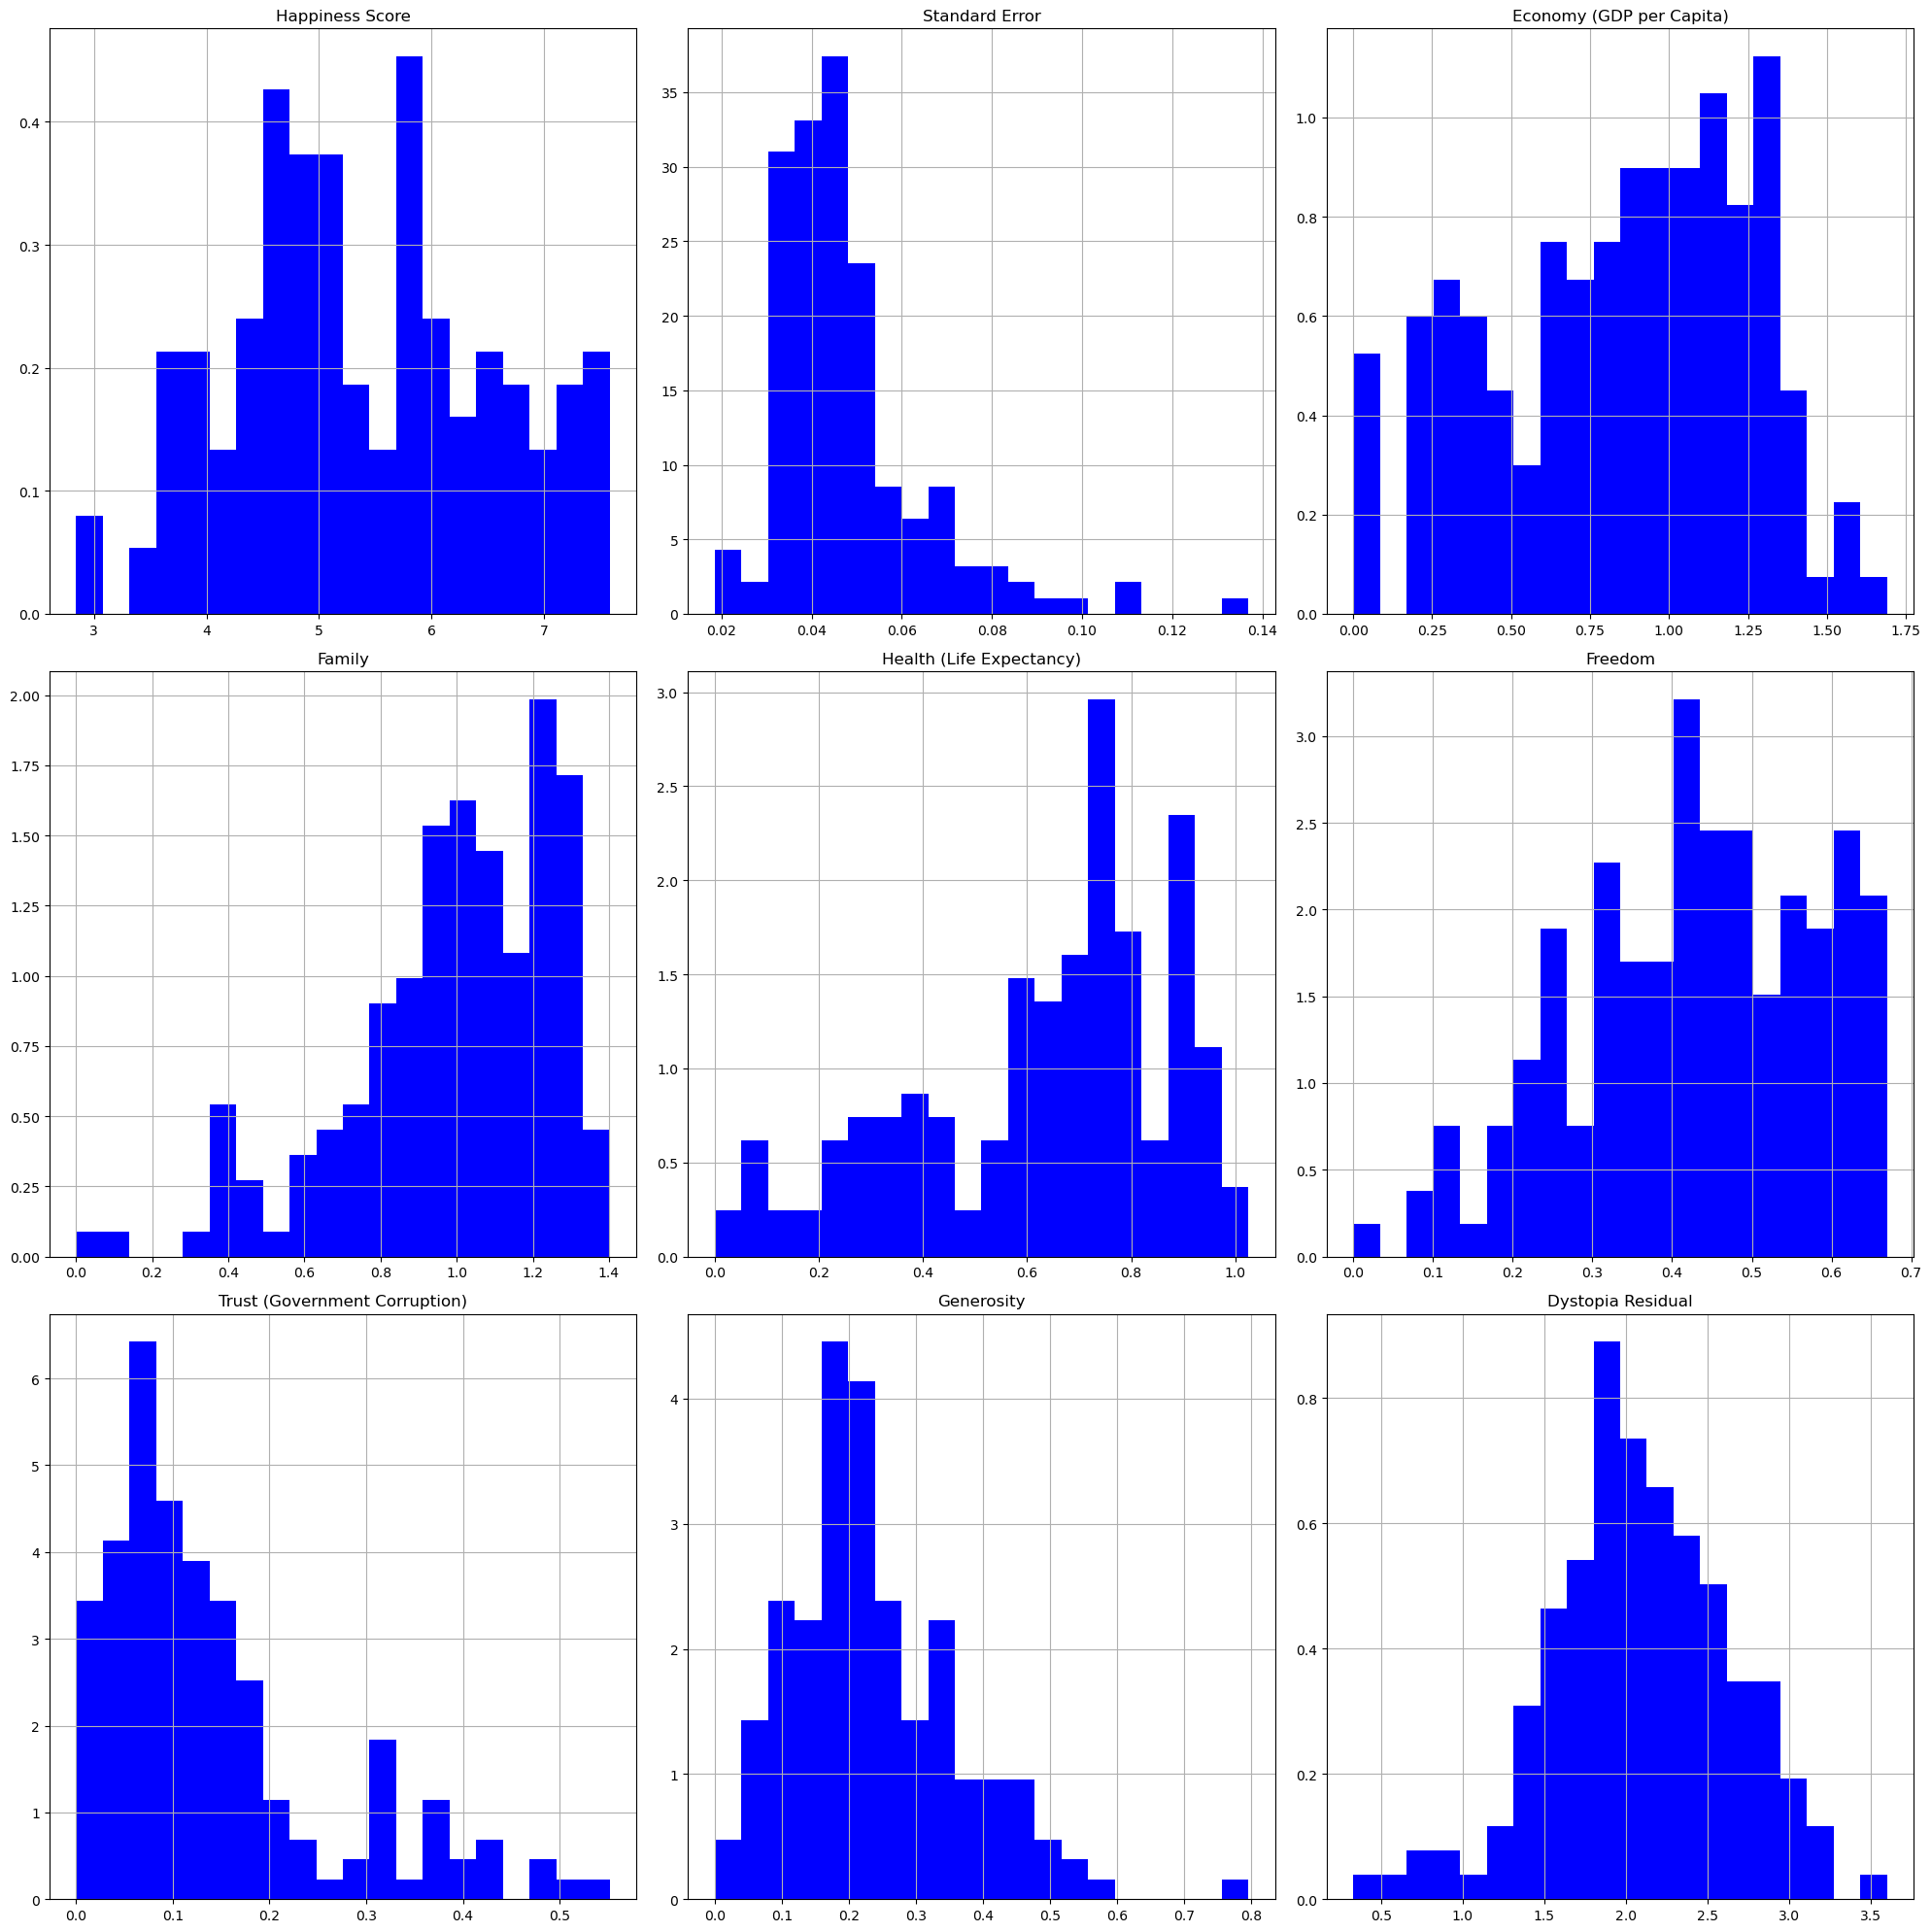

In [17]:
plt.rcParams['figure.figsize']=(20,20)
df_score_New.hist(bins=20,color='blue',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

Histogram that there are columns with skewness and not normally distributed.
Confirm the presence of skewness by using box plot and skew()

Box Ploting:

Happiness Score                     AxesSubplot(0.125,0.747241;0.0945122x0.132759)
Standard Error                   AxesSubplot(0.238415,0.747241;0.0945122x0.132759)
Economy (GDP per Capita)         AxesSubplot(0.351829,0.747241;0.0945122x0.132759)
Family                           AxesSubplot(0.465244,0.747241;0.0945122x0.132759)
Health (Life Expectancy)         AxesSubplot(0.578659,0.747241;0.0945122x0.132759)
Freedom                          AxesSubplot(0.692073,0.747241;0.0945122x0.132759)
Trust (Government Corruption)    AxesSubplot(0.805488,0.747241;0.0945122x0.132759)
Generosity                          AxesSubplot(0.125,0.587931;0.0945122x0.132759)
Dystopia Residual                AxesSubplot(0.238415,0.587931;0.0945122x0.132759)
dtype: object

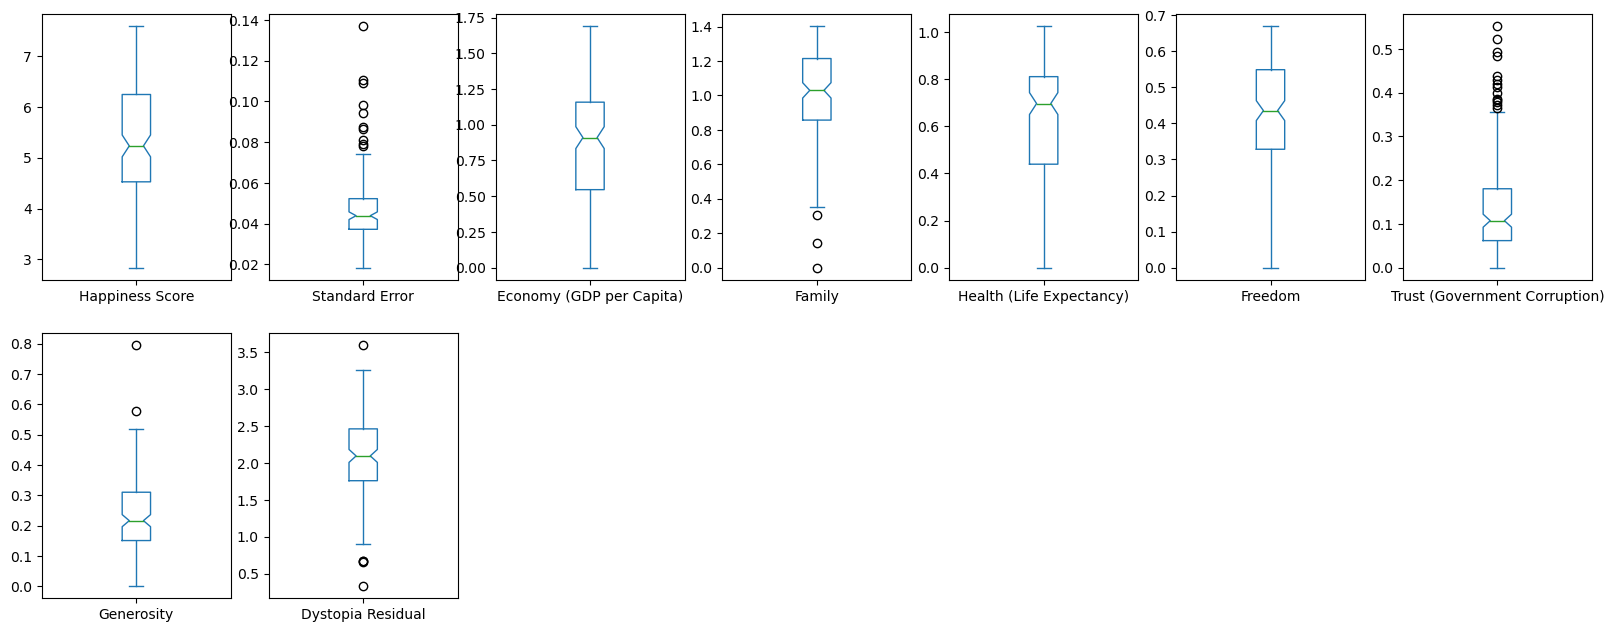

In [18]:
df_score_New.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20),notch=True)

Standard error,Trust,Family,Generosity,dystopia Residual we can see skewness is present

# Finding Skewness by using skew()

In [19]:
df_score_New.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

from the skew() method we see certain columns that are not in the acceptable range of -0.5 to 0.5 that indicates that we hav outliers present in our ata set will need to be treated

# Outlier removal:

Acceptable range of Skewness: -0.5/+0.5

In [20]:
z=np.abs(zscore(df_score_New))
threshold=3
np.where(z>3)
df_score_New1=df_score_New[(z<3).all(axis=1)]
df_score_New1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


Zscore method we are able to detect the Outliers and have removed them from our data set

In [21]:
#Percentage of Dataloss:
data_loss=(158-149)/(158*100)
data_loss

0.000569620253164557

# Splitting the dataset into 2 Variables namely 'X','Y' for feature and label

In [22]:
x=df_score_New1.drop('Happiness Score',axis=1)
y=df_score_New1['Happiness Score']

In [23]:
x.shape

(149, 8)

In [24]:
y.shape

(149,)

In [25]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [26]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

# Scaling

In [27]:
scale1=PowerTransformer(method='yeo-johnson')
x_scaled=pd.DataFrame(scale1.fit_transform(x),columns=x.columns)

In [28]:
x_scaled

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.950337,1.492454,1.658880,1.469636,1.754982,1.817625,0.659579,0.755255
1,0.378562,1.194067,2.009125,1.511292,1.442182,0.329676,1.562604,1.111168
2,-1.041401,1.266612,1.730785,1.053469,1.616037,1.953400,0.977226,0.706495
3,-0.471124,1.695302,1.540248,1.117188,1.791023,1.664359,1.015018,0.655082
4,-0.799032,1.269159,1.487718,1.242549,1.477337,1.541247,1.682150,0.629030
...,...,...,...,...,...,...,...,...
144,0.563000,-1.052662,-1.047195,-1.707662,0.204409,0.681035,-0.131736,-1.339678
145,-0.068119,-1.490349,-0.778550,-1.435893,-0.300343,0.188577,0.012019,-1.249871
146,-1.320810,-1.365216,-2.087389,-1.352388,-1.265395,-0.192843,1.134258,-0.327115
147,-0.692726,-1.433041,-2.010443,-1.309709,0.318123,-0.434498,-0.312080,-0.932164


 Display all the datas after apply Power Transformer scaler

In [29]:
#creating the training and testing data sets;
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=0.75,random_state=42,shuffle=True)

# Machine Learning Model for Regression

In [30]:
#Model Selection:
linear_model=LinearRegression()
svr_model=SVR(C=1.0,epsilon=0.2,kernel='poly',gamma='auto')
dtr_model=DecisionTreeRegressor(criterion='poisson',random_state=111)
rfr_model=RandomForestRegressor(max_depth=2,max_features='sqrt')
knr_model=KNeighborsRegressor(n_neighbors=2,algorithm='kd_tree')

In [31]:
#Training the Models:
linear_model.fit(x_train,y_train)
svr_model.fit(x_train,y_train)
dtr_model.fit(x_train,y_train)
rfr_model.fit(x_train,y_train)
knr_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2)

In [32]:
#prediction:
pred_linear=linear_model.predict(x_test)
pred_svr=svr_model.predict(x_test)
pred_dtr=dtr_model.predict(x_test)
pred_rfr=rfr_model.predict(x_test)
pred_knr=knr_model.predict(x_test)

Once the model are trained we are predicting the label by providing the unseen test features and storing the values ina predicted variable

# Evalution Metrics

In [33]:
se_linear=mean_squared_error(y_test,pred_linear)
se_svr=mean_squared_error(y_test,pred_svr)
se_dtr=mean_squared_error(y_test,pred_dtr)
se_rfr=mean_squared_error(y_test,pred_rfr)
se_knr=mean_squared_error(y_test,pred_knr)

rmse_linear=sqrt(se_linear)
rmse_svr=sqrt(se_svr)
rmse_dtr=sqrt(se_dtr)
rmse_rfr=sqrt(se_rfr)
rmse_knr=sqrt(se_knr)

print("Linear Regression is:",rmse_linear)
print("Support vector Regrssion is:",rmse_svr)
print("Decision Tree Regressor is:",rmse_dtr)
print("Random Forest Regressor is:",rmse_rfr)
print("K Neighbors Regressor is:",rmse_knr)

Linear Regression is: 0.06638458610380146
Support vector Regrssion is: 0.4302095934215018
Decision Tree Regressor is: 0.6827919656974976
Random Forest Regressor is: 0.6045010578994351
K Neighbors Regressor is: 0.34579756208997253


In [34]:
#R2 score for the model

print("R2 Score for Linear Regression is:",r2_score(y_test,pred_linear,multioutput='variance_weighted')*100)
print("R2 Score for Support Vector Regression is:",r2_score(y_test,pred_svr,multioutput='variance_weighted')*100)
print("R2 Score for Decision Tree Regressor is:",r2_score(y_test,pred_dtr,multioutput='variance_weighted')*100)
print("R2 Score for Random Forest Regressor is:",r2_score(y_test,pred_rfr,multioutput='variance_weighted')*100)
print("R2 Score for K Neighbors Regressor is:",r2_score(y_test,pred_knr,multioutput='variance_weighted')*100)

R2 Score for Linear Regression is: 99.61289492395045
R2 Score for Support Vector Regression is: 83.7424707579808
R2 Score for Decision Tree Regressor is: 59.04837243238613
R2 Score for Random Forest Regressor is: 67.90122245711161
R2 Score for K Neighbors Regressor is: 89.49639897867345


In [35]:
#Hyper parameter tuning on the best Ml Model
Lr_Param={'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'n_jobs':[1,2,3,4,5,6,7,8,9,10]}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
GSCV=GridSearchCV(LinearRegression(),Lr_Param,cv=5)

In [38]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'normalize': [True, False]})

In [39]:
GSCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}

In [40]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1, normalize=True)
Classifer=Final_model.fit(x_train,y_train)
lr_pred=Final_model.predict(x_test)
lr_r2_score=r2_score(y_test,lr_pred,multioutput='variance_weighted')
print("R2 score for the final model is:",lr_r2_score*100)

R2 score for the final model is: 99.61289492395045


# Saving the Model:

In [42]:
filename='FinalModel_Happiness.pk1'
pickle.dump(Final_model,open(filename,'wb')) #saved final model with the help of pickle method

# Loading the Model:

In [43]:
load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_test,y_test)*100
print(result) #loaded the saved model and passed the unseen data set to predict the model score.

99.61289492395045


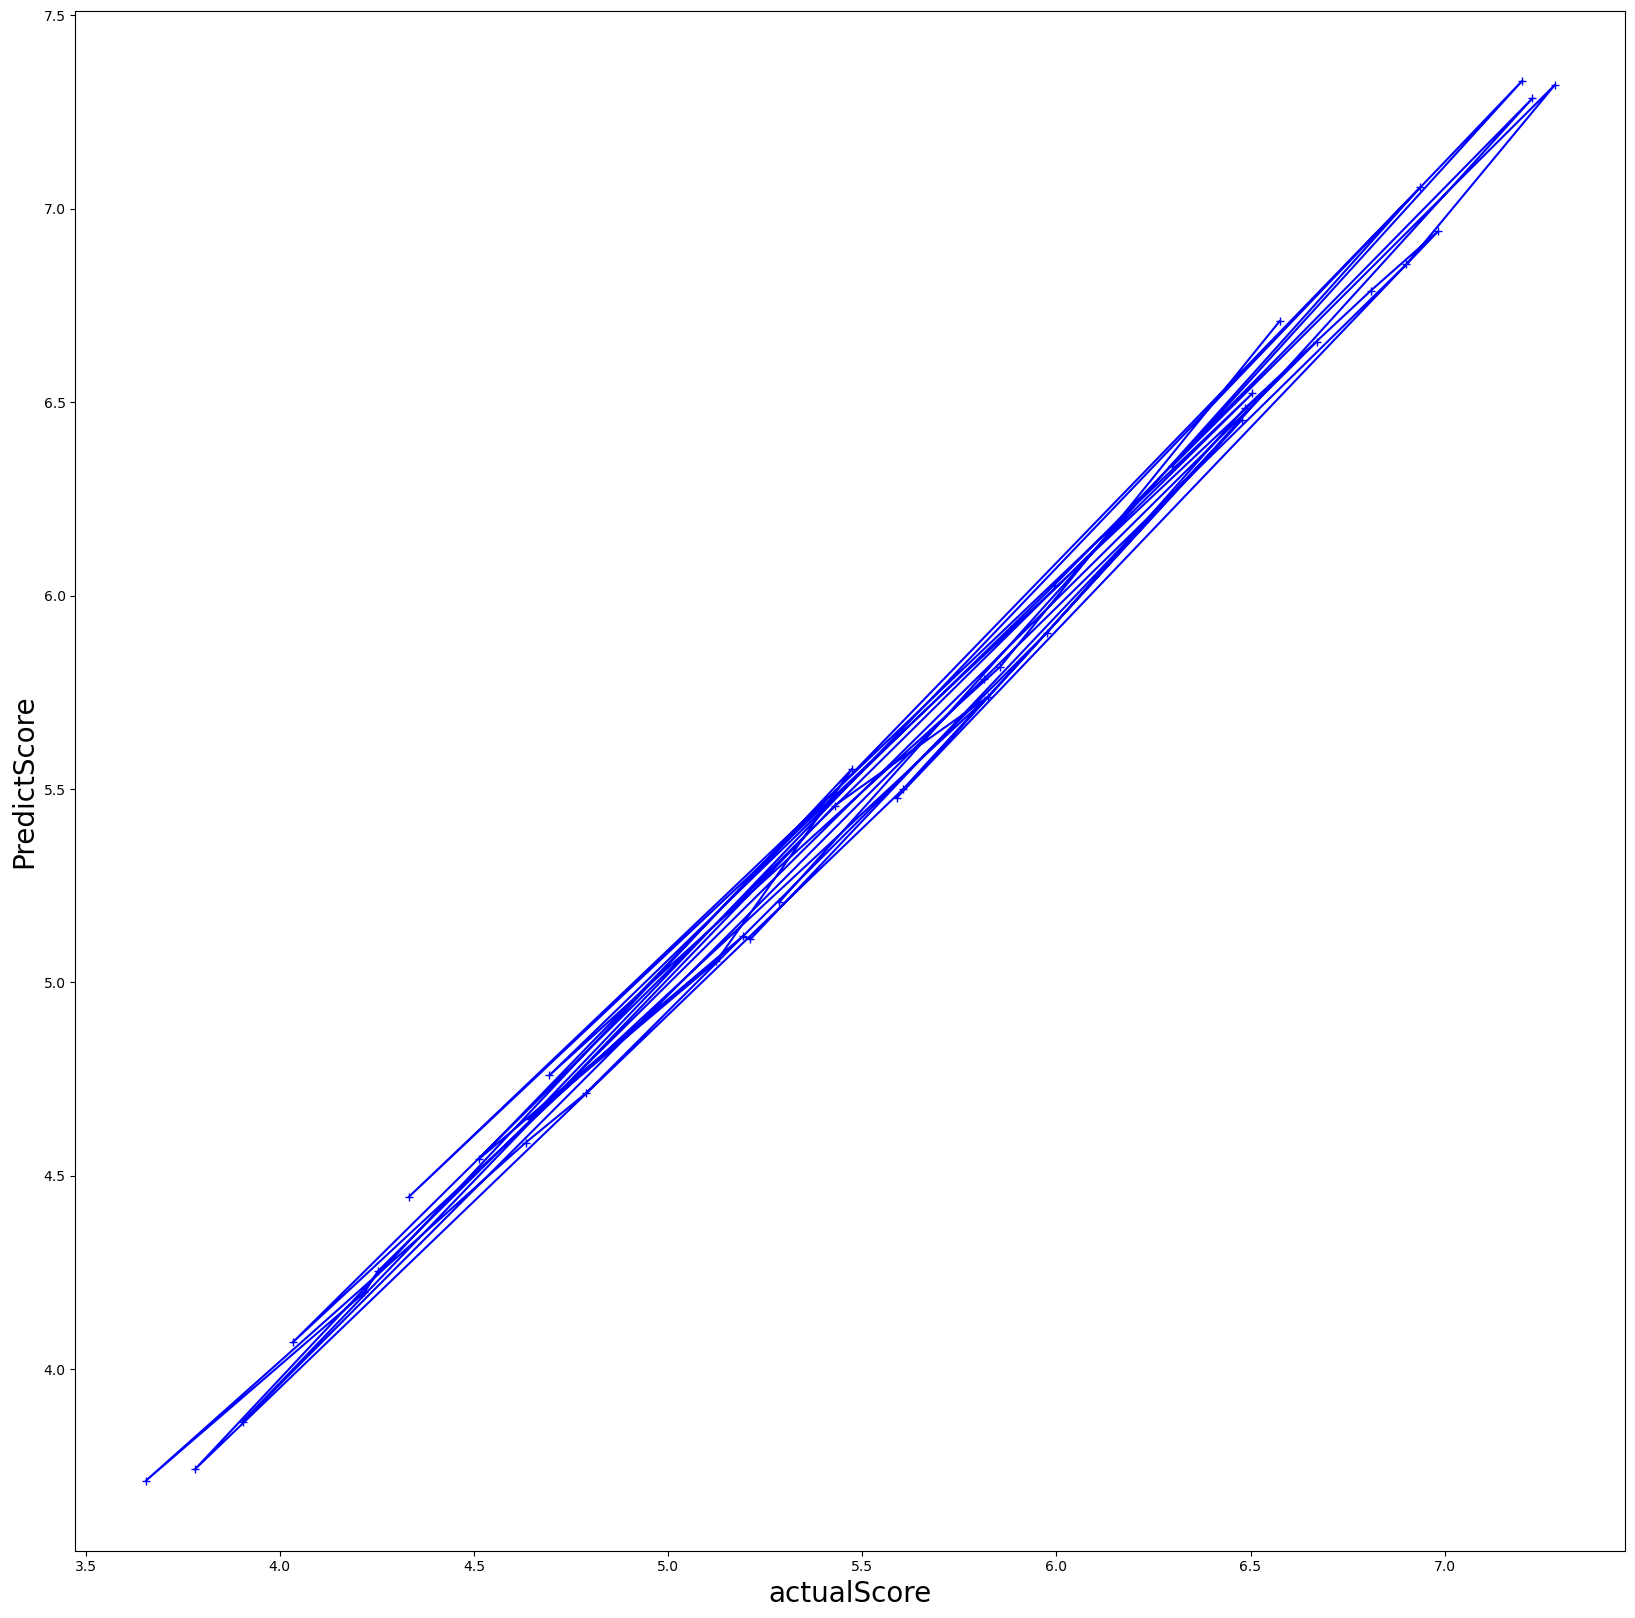

In [44]:
plt.xlabel('actualScore',fontsize=20)
plt.ylabel('PredictScore',fontsize=20)
plt.plot(y_test,lr_pred,color='blue',marker='+')
plt.show()